# DM - CA2 - Mohamad Taha Fakharian
In this computer assignment, we're going to process a market basket to find some association rules among products in market. 

Let's start with preprocessing!

First we need to import some useful libraries for data manipulating:

In [150]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Market basket analyze
from apyori import apriori
import mlxtend

# Display dataframes
from IPython.display import display

# Time
import time

In [151]:
basket = pd.read_csv('../Datasets/Market_Basket.csv', header=None)

In [152]:
basket.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q1

In [153]:
from mlxtend.preprocessing import TransactionEncoder

In [154]:
def preprocess(raw_basket):
    basket_list = raw_basket.values.tolist()
    basket = [[item.strip() for item in transaction if pd.notnull(item)] for transaction in basket_list]
    
    te = TransactionEncoder()
    array = te.fit(basket).transform(basket)
    
    basket = pd.DataFrame(array, columns=te.columns_)
    return basket

In [155]:
basket = preprocess(basket)

In [156]:
display(basket)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
per_item = basket.sum()
per_item = per_item.sort_values()

In [158]:
display(per_item)

water spray         3
napkins             5
cream               7
bramble            14
tea                29
                 ... 
chocolate        1229
french fries     1282
spaghetti        1306
eggs             1348
mineral water    1788
Length: 119, dtype: int64

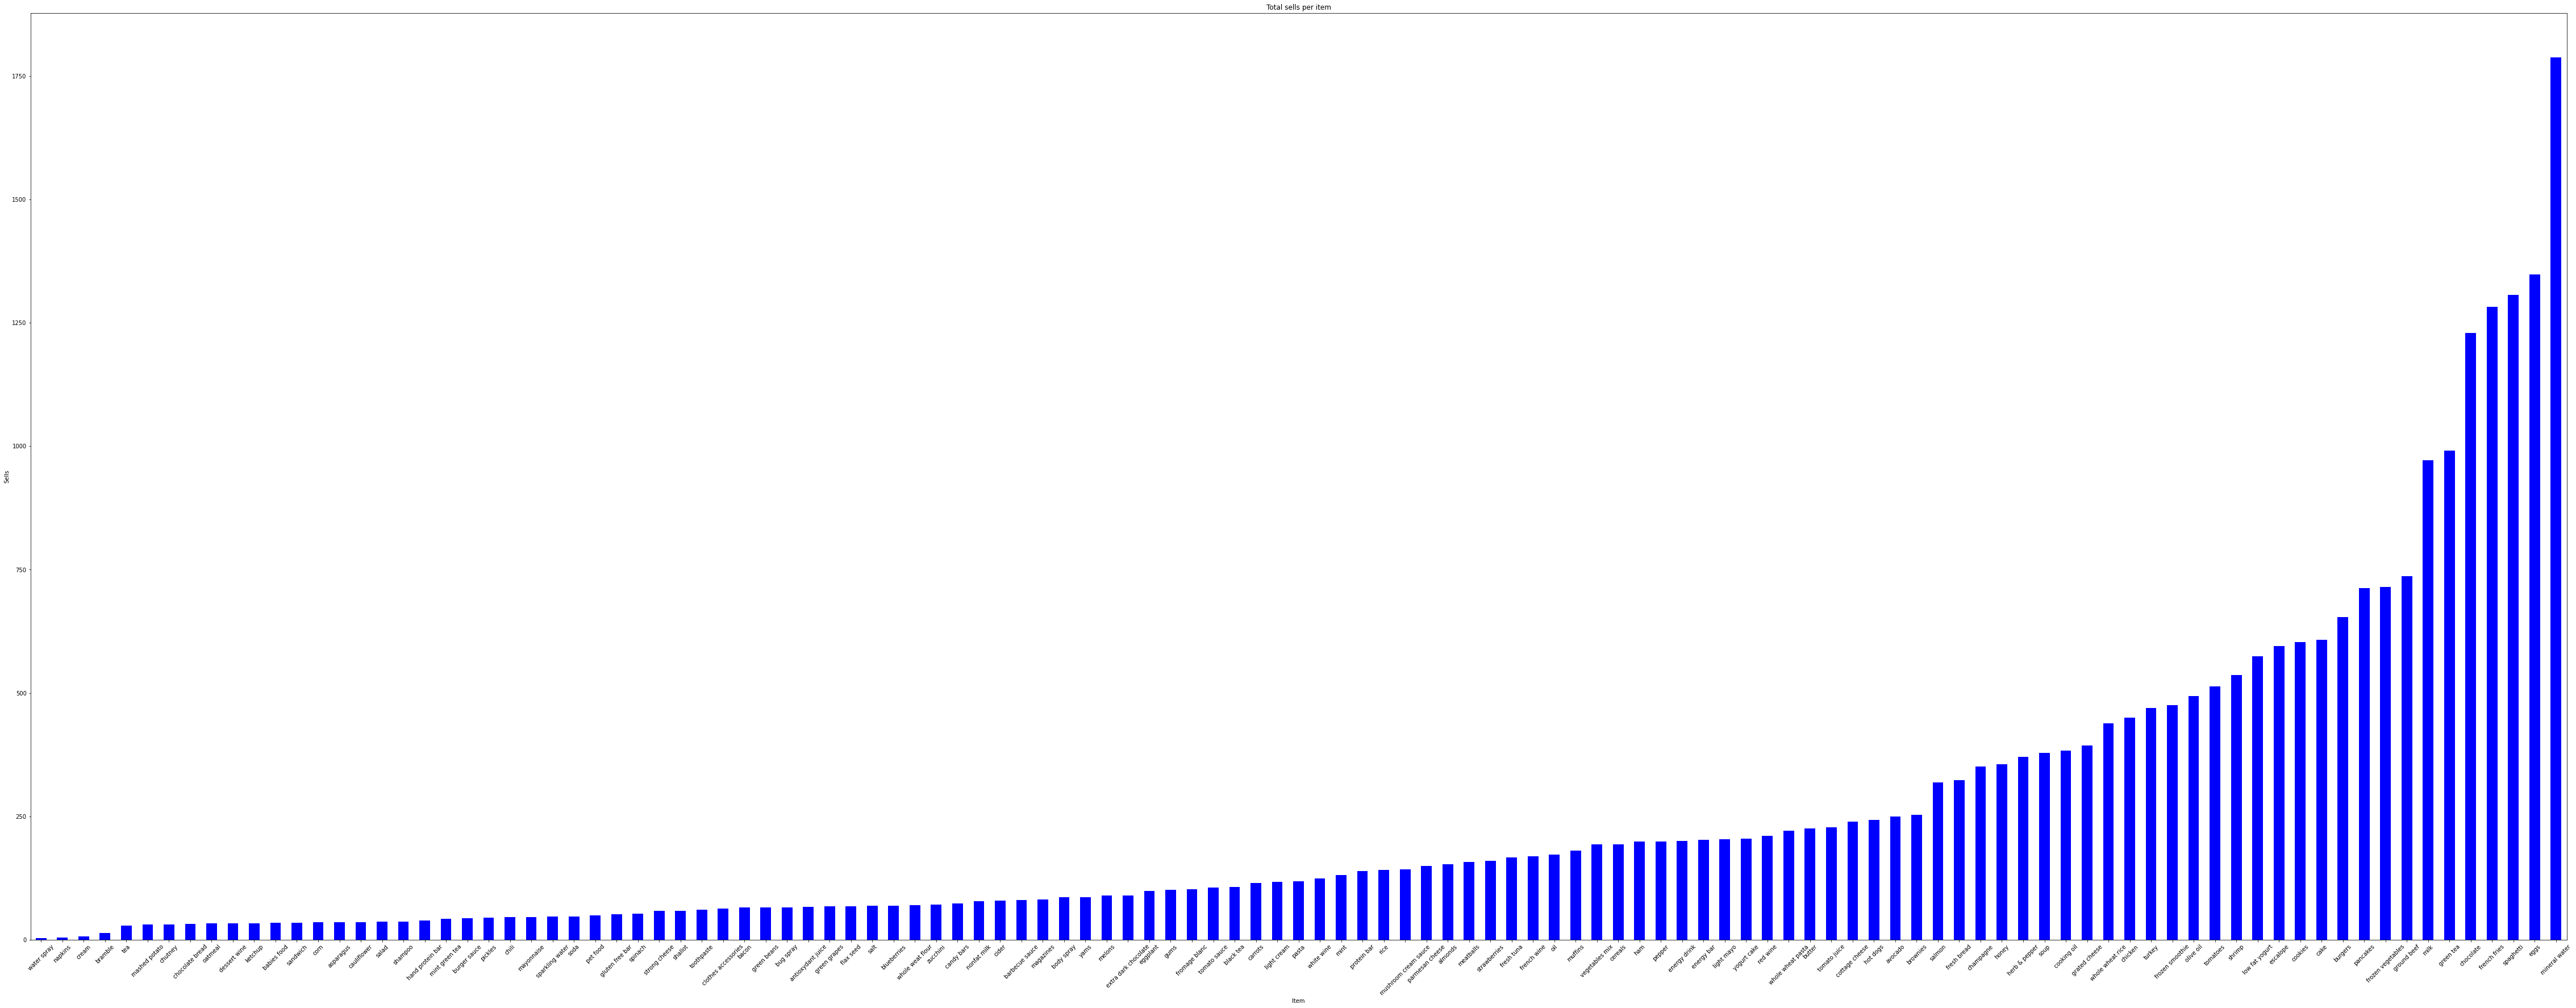

In [159]:
plt.figure(figsize=(80,30))
ax = per_item.plot.bar(color='b')
plt.xticks(rotation = 45)
ax.set_title("Total sells per item")
ax.set_xlabel('Item')
ax.set_ylabel('Sells')
plt.show()

In [160]:
five_most_sold = per_item[-5:]
five_most_sold

chocolate        1229
french fries     1282
spaghetti        1306
eggs             1348
mineral water    1788
dtype: int64

In [161]:
black_tea = basket[basket['black tea'] == True]
len(black_tea)

107

In [162]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [163]:
def mine_frequent_itemsets(method, basket, min_support, min_length=1):
    frequent_itemsets = method(basket, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    
    return frequent_itemsets[frequent_itemsets['length'] >= min_length]

In [164]:
message = 'Min support = {}, Min length = {} using {}. Spent time: {}s'
min_supports = [0.003, 0.03, 0.3]
min_length = 2
method = 'Apriori'

for support in min_supports:
    t0 = time.time()
    display(mine_frequent_itemsets(apriori, basket, support, min_length=min_length))
    t1 = time.time()
    print(message.format(support, min_length, method, t1 - t0))
    print('----------------\n')

,support,itemsets,length
115,0.005199,"(almonds, burgers)",2
116,0.003066,"(almonds, cake)",2
117,0.005999,"(almonds, chocolate)",2
118,0.006532,"(almonds, eggs)",2
119,0.004399,"(almonds, french fries)",2
...,...,...,...
1438,0.003066,"(ground beef, pancakes, spaghetti, mineral water)",4
1439,0.003066,"(ground beef, spaghetti, mineral water, tomatoes)",4
1440,0.003333,"(olive oil, mineral water, spaghetti, milk)",4
1441,0.003066,"(mineral water, milk, spaghetti, shrimp)",4


Min support = 0.003, Min length = 2 using Apriori. Spent time: 1.1388754844665527s
----------------



,support,itemsets,length
36,0.033196,"(eggs, chocolate)",2
37,0.034395,"(chocolate, french fries)",2
38,0.032129,"(chocolate, milk)",2
39,0.052660,"(chocolate, mineral water)",2
40,0.039195,"(chocolate, spaghetti)",2
41,0.036395,"(eggs, french fries)",2
42,0.030796,"(eggs, milk)",2
43,0.050927,"(eggs, mineral water)",2
44,0.036528,"(eggs, spaghetti)",2
45,0.033729,"(mineral water, french fries)",2


Min support = 0.03, Min length = 2 using Apriori. Spent time: 0.030541658401489258s
----------------



,support,itemsets,length


Min support = 0.3, Min length = 2 using Apriori. Spent time: 0.00799560546875s
----------------



In [165]:
min_support = 0.05
min_length = 1
method = 'FPGrowth'

t0 = time.time()
display(mine_frequent_itemsets(fpgrowth, basket, min_support, min_length=min_length))
t1 = time.time()
print(message.format(support, min_length, method, t1 - t0))
print('----------------\n')

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.132116,(green tea),1
2,0.076523,(low fat yogurt),1
3,0.071457,(shrimp),1
4,0.065858,(olive oil),1
5,0.063325,(frozen smoothie),1
6,0.179709,(eggs),1
7,0.087188,(burgers),1
8,0.062525,(turkey),1
9,0.129583,(milk),1


Min support = 0.3, Min length = 1 using FPGrowth. Spent time: 0.08103322982788086s
----------------



In [166]:
def mine_association_rules(method, basket, min_support, metric, min_threshold, min_length=1):
    frequent_itemsets = mine_frequent_itemsets(method, basket, min_support, min_length)
    return association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)

In [167]:
metric = 'confidence'
min_confidences = [0.2, 0.35]
min_support = 0.03
message = 'Min support = {}, Min confidence = {} using {}. Spent time: {}s'
method = 'FPGrowth'

for confidence in min_confidences:
    t0 = time.time()
    rules = mine_association_rules(fpgrowth, basket, min_support, 'confidence', confidence)
    display(rules.sort_values(by=['lift'], ascending=False))
    t1 = time.time()
    print(message.format(min_support, confidence, method, t1 - t0))
    print('----------------\n')    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
24,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
15,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
5,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043
6,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
3,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
23,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529


Min support = 0.03, Min confidence = 0.2 using FPGrowth. Spent time: 0.07083415985107422s
----------------



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
3,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
0,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
2,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529


Min support = 0.03, Min confidence = 0.35 using FPGrowth. Spent time: 0.1151742935180664s
----------------

